In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['bigml_59c28831336c6604c800002a.csv']


In [2]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 sns.set(rc={'figure.figsize':(10, 8)}); # you can change this if needed

In [3]:
df = pd.read_csv('../input/bigml_59c28831336c6604c800002a.csv')
df.head(10)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
new_values={'no':0,'yes':1}
df['international plan']=df['international plan'].map(new_values)
df['voice mail plan']=df['voice mail plan'].map(new_values)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df1=df.drop('phone number',axis=1)
df1.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df2=pd.get_dummies(df1,prefix=['international plan','voice mail plan'],columns=['state','area code'])
df2.head(10)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_AK,international plan_AL,international plan_AR,international plan_AZ,international plan_CA,international plan_CO,international plan_CT,international plan_DC,international plan_DE,international plan_FL,international plan_GA,international plan_HI,international plan_IA,international plan_ID,international plan_IL,international plan_IN,international plan_KS,international plan_KY,international plan_LA,international plan_MA,international plan_MD,international plan_ME,international plan_MI,international plan_MN,international plan_MO,international plan_MS,international plan_MT,international plan_NC,international plan_ND,international plan_NE,international plan_NH,international plan_NJ,international plan_NM,international plan_NV,international plan_NY,international plan_OH,international plan_OK,international plan_OR,international plan_PA,international plan_RI,international plan_SC,international plan_SD,international plan_TN,international plan_TX,international plan_UT,international plan_VA,international plan_VT,international plan_WA,international plan_WI,international plan_WV,international plan_WY,voice mail plan_408,voice mail plan_415,voice mail plan_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split
X=df2.drop('churn',axis=1)
y=df2['churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
# Обучение дерева решений
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=2019,max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2019,
            splitter='best')

In [9]:
# Визуализация

from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot')
print(open('tree.dot').read()) 
# Далее скопировать полученный текст на сайт https://dreampuf.github.io/GraphvizOnline/ и сгенерировать граф
# Вставить картинку в блокнот


digraph Tree {
node [shape=box] ;
0 [label="X[6] <= 44.805\ngini = 0.249\nsamples = 2333\nvalue = [1993, 340]"] ;
1 [label="X[16] <= 3.5\ngini = 0.204\nsamples = 2174\nvalue = [1923, 251]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= 0.5\ngini = 0.15\nsamples = 2000\nvalue = [1837, 163]"] ;
1 -> 2 ;
3 [label="gini = 0.096\nsamples = 1822\nvalue = [1730, 92]"] ;
2 -> 3 ;
4 [label="gini = 0.48\nsamples = 178\nvalue = [107, 71]"] ;
2 -> 4 ;
5 [label="X[6] <= 28.195\ngini = 0.5\nsamples = 174\nvalue = [86, 88]"] ;
1 -> 5 ;
6 [label="gini = 0.221\nsamples = 79\nvalue = [10, 69]"] ;
5 -> 6 ;
7 [label="gini = 0.32\nsamples = 95\nvalue = [76, 19]"] ;
5 -> 7 ;
8 [label="X[2] <= 0.5\ngini = 0.493\nsamples = 159\nvalue = [70, 89]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="X[7] <= 184.65\ngini = 0.4\nsamples = 116\nvalue = [32, 84]"] ;
8 -> 9 ;
10 [label="gini = 0.444\nsamples = 39\nvalue = [26, 13]"] ;
9 -> 10 ;
11 [label="g

Первый признак для разбиения --- это признак $X[6]$ (total day charge). Порог --- 44.805 $(X[6]\leq44.805)$. $GI=0.249$ (чем меньше GI, тем разбиение лучше). 

In [10]:
# Предсказания для валидационного множества
from sklearn.metrics import accuracy_score
y_pred=tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.9

In [11]:
# Кросс-валидация и подбор гиперпараметров
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

tree1=DecisionTreeClassifier(random_state=2019)
tree1_params1={'max_depth':np.arange(2,11)}
kf=KFold(n_splits=5,shuffle=True,random_state=42)
tree1_grid=GridSearchCV(tree1,tree1_params1,scoring='accuracy',cv=kf)
tree1_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2019,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [12]:
tree1_grid.best_params_

{'max_depth': 6}

In [13]:
pd.DataFrame(tree1_grid.cv_results_).T

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.00876012,0.0102389,0.011835,0.0141012,0.0166433,0.0187203,0.0207307,0.0213585,0.0241458
std_fit_time,0.00180711,0.000242131,0.000203778,0.000476085,0.000192586,0.000459421,0.000520977,0.000451637,0.000613801
mean_score_time,0.00135493,0.00127525,0.00121217,0.00120883,0.00121489,0.00134726,0.00128303,0.0012362,0.00136399
std_score_time,0.000221673,1.39032e-05,5.41271e-05,3.91583e-05,5.02199e-05,0.000114286,7.41186e-05,7.80131e-05,5.39132e-05
param_max_depth,2,3,4,5,6,7,8,9,10
params,{'max_depth': 2},{'max_depth': 3},{'max_depth': 4},{'max_depth': 5},{'max_depth': 6},{'max_depth': 7},{'max_depth': 8},{'max_depth': 9},{'max_depth': 10}
split0_test_score,0.875803,0.90364,0.916488,0.944325,0.944325,0.940043,0.940043,0.944325,0.931478
split1_test_score,0.865096,0.910064,0.912206,0.91863,0.927195,0.91863,0.927195,0.922912,0.916488
split2_test_score,0.87152,0.882227,0.90364,0.927195,0.929336,0.927195,0.922912,0.925054,0.91863
split3_test_score,0.849785,0.869099,0.877682,0.920601,0.920601,0.922747,0.924893,0.927039,0.924893


In [14]:
tree2=DecisionTreeClassifier(max_depth=tree1_grid.best_params_['max_depth'],random_state=2019)

In [15]:
tree2_params2={'min_samples_leaf':np.arange(1,11)}
kf=KFold(n_splits=5,shuffle=True,random_state=42)
tree2_grid=GridSearchCV(tree2,tree2_params2,scoring='accuracy',cv=kf)
tree2_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2019,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [16]:
tree2_grid.best_params_

{'min_samples_leaf': 2}

In [17]:
tree2_grid.best_score_

0.9357051007286755

In [18]:
pd.DataFrame(tree2_grid.cv_results_).T

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.0153284,0.0158113,0.0158891,0.0159101,0.0160616,0.0154813,0.0154274,0.0151921,0.0164649,0.0147448
std_fit_time,0.000646917,0.00103155,0.000535427,0.000708288,0.000325242,0.000541774,0.00079652,0.000550898,0.00073554,0.000404082
mean_score_time,0.00111704,0.00141172,0.0012074,0.00112443,0.00144892,0.00127273,0.00133681,0.00115643,0.00137343,0.00115452
std_score_time,4.68788e-05,0.000134134,0.000161892,5.69798e-05,0.000219119,8.38619e-05,0.000252019,7.36964e-05,0.000126698,3.7537e-05
param_min_samples_leaf,1,2,3,4,5,6,7,8,9,10
params,{'min_samples_leaf': 1},{'min_samples_leaf': 2},{'min_samples_leaf': 3},{'min_samples_leaf': 4},{'min_samples_leaf': 5},{'min_samples_leaf': 6},{'min_samples_leaf': 7},{'min_samples_leaf': 8},{'min_samples_leaf': 9},{'min_samples_leaf': 10}
split0_test_score,0.944325,0.946467,0.948608,0.948608,0.948608,0.944325,0.942184,0.940043,0.940043,0.940043
split1_test_score,0.927195,0.93576,0.931478,0.925054,0.929336,0.929336,0.929336,0.925054,0.922912,0.927195
split2_test_score,0.929336,0.933619,0.931478,0.931478,0.940043,0.93576,0.933619,0.931478,0.93576,0.925054
split3_test_score,0.920601,0.922747,0.922747,0.927039,0.922747,0.924893,0.924893,0.922747,0.924893,0.924893


Text(0, 0.5, 'Mean accuracy on test set')

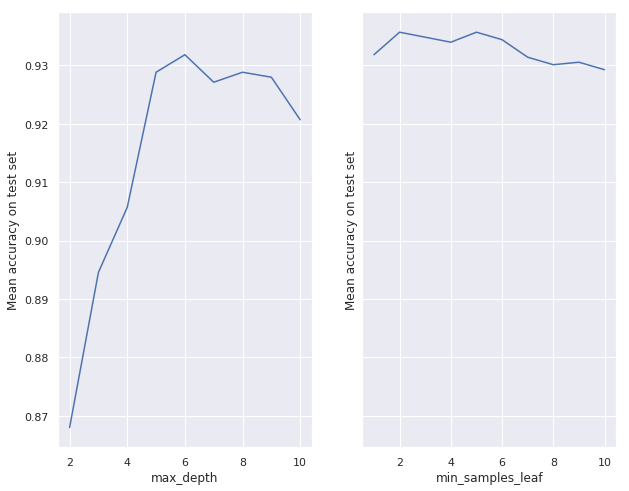

In [19]:
# Отрисовка графиков
import matplotlib.pyplot as plt

fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True) # 2 графика рядом с одинаковым масштабом по оси Оу

ax[0].plot(tree1_params1['max_depth'],tree1_grid.cv_results_['mean_test_score']) # accuracy vs max_depth
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('Mean accuracy on test set')

ax[1].plot(tree2_params2['min_samples_leaf'],tree2_grid.cv_results_['mean_test_score']) # accuracy vs min_samples_leaf
ax[1].set_xlabel('min_samples_leaf')
ax[1].set_ylabel('Mean accuracy on test set') # при max_depth=6

In [20]:
best_tree=tree2_grid.best_estimator_
y_pred=best_tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.941

In [21]:
export_graphviz(best_tree, out_file='best_tree.dot')
print(open('best_tree.dot').read()) 
# Далее скопировать полученный текст на сайт https://dreampuf.github.io/GraphvizOnline/ и сгенерировать граф
# Вставить картинку в блокнот

digraph Tree {
node [shape=box] ;
0 [label="X[6] <= 44.805\ngini = 0.249\nsamples = 2333\nvalue = [1993, 340]"] ;
1 [label="X[16] <= 3.5\ngini = 0.204\nsamples = 2174\nvalue = [1923, 251]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= 0.5\ngini = 0.15\nsamples = 2000\nvalue = [1837, 163]"] ;
1 -> 2 ;
3 [label="X[6] <= 37.95\ngini = 0.096\nsamples = 1822\nvalue = [1730, 92]"] ;
2 -> 3 ;
4 [label="X[9] <= 29.0\ngini = 0.056\nsamples = 1563\nvalue = [1518, 45]"] ;
3 -> 4 ;
5 [label="X[9] <= 14.345\ngini = 0.054\nsamples = 1557\nvalue = [1514, 43]"] ;
4 -> 5 ;
6 [label="gini = 0.022\nsamples = 443\nvalue = [438, 5]"] ;
5 -> 6 ;
7 [label="gini = 0.066\nsamples = 1114\nvalue = [1076, 38]"] ;
5 -> 7 ;
8 [label="X[12] <= 10.39\ngini = 0.444\nsamples = 6\nvalue = [4, 2]"] ;
4 -> 8 ;
9 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
8 -> 10 ;
11 [label="X[9] <= 22.67\ngini = 0.297\nsamples = 

Первый признак для разбиения (как и у предыдущего дерева) --- это признак $X[6]$ (total day charge). Порог --- 44.805, $GI=0.249.$

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


clf=RandomForestClassifier(n_estimators=100,random_state=2019)
clf.fit(X_train,y_train)
y_pr=clf.predict(X_test)
accuracy_score(y_test,y_pr)

0.939

In [23]:
clf1=RandomForestClassifier(random_state=2019)
n_est={'n_estimators':np.arange(80,110,1)}
kf=kf=KFold(n_splits=5,shuffle=True,random_state=2019)
clf1_grid=GridSearchCV(clf1,n_est,scoring='accuracy',cv=kf)
clf1_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2019, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
clf1_grid.best_score_

0.9288469781397343

In [25]:
clf1_grid.best_params_

{'n_estimators': 81}

In [26]:
clf2=RandomForestClassifier(n_estimators=81,random_state=2019)
clf2.fit(X_train,y_train)
y_pr=clf2.predict(X_test)
accuracy_score(y_test,y_pr)

0.942